In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
import time
plt.style.use('seaborn')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'SimHei'
%matplotlib inline 

plt.rcParams['xtick.direction'] = 'inout'  # x軸刻度 位置
plt.rcParams['xtick.major.size'] = 3.5 # x軸刻度 長度

In [38]:
df = pd.read_csv('台中市交通_1011.csv', engine='python')
df = df.drop(df.columns[0], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40249 entries, 0 to 40248
Data columns (total 12 columns):
年         40249 non-null int64
月         40249 non-null int64
日         40249 non-null int64
時         40249 non-null int64
分         40249 non-null int64
縣市        40249 non-null object
區         40249 non-null object
GPS座標X    38182 non-null float64
GPS座標Y    38182 non-null float64
count     40249 non-null int64
10月       40249 non-null int64
11月       40249 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 3.7+ MB


In [24]:
df.head()

,年,月,日,時,分,縣市,區,GPS座標X,GPS座標Y,count,10月,11月
0,2017,10,1,0,1,臺中市,南屯區,24.132124,120.648291,1,1,0
1,2017,10,1,0,1,臺中市,南屯區,24.132124,120.648291,1,0,1
2,2017,11,1,0,7,臺中市,霧峰區,24.073801,120.663218,1,1,0
3,2017,11,1,0,7,臺中市,霧峰區,24.073801,120.663218,1,0,1
4,2017,10,1,0,5,臺中市,南屯區,24.135295,120.638802,1,1,0


# Map

In [4]:
villages_shp = gp.read_file("mapdata/VILLAGE_MOI_121_1070330.shp") #全台灣村里界圖
taichung_shp = villages_shp.query('COUNTYNAME=="臺中市"') #臺中市村里界圖
taichung_shp.head()

,VILLCODE,COUNTYNAME,TOWNNAME,VILLNAME,VILLENG,COUNTYID,COUNTYCODE,TOWNID,TOWNCODE,NOTE,geometry
30,66000110029,臺中市,大甲區,建興里,Jianxing Vil.,B,66000,B11,66000110,None,"POLYGON ((211953.8593720552 2700835.999980656,..."
31,66000120001,臺中市,清水區,鰲峰里,Aofeng Vil.,B,66000,B12,66000120,None,"POLYGON ((207824.5624888235 2685427.000032167,..."
184,66000120002,臺中市,清水區,靈泉里,Lingquan Vil.,B,66000,B12,66000120,None,"POLYGON ((206884.8828465287 2684199.698836186,..."
185,66000120003,臺中市,清水區,清水里,Qingshui Vil.,B,66000,B12,66000120,None,"POLYGON ((207237.3107313524 2685067.596949181,..."
186,66000120004,臺中市,清水區,文昌里,Wenchang Vil.,B,66000,B12,66000120,None,"POLYGON ((207030.4703489374 2685241.511249905,..."


In [39]:
tc10 = pd.DataFrame({'10月' : df[df['月']==10].groupby(['區']).size()}).reset_index()
tc11 = pd.DataFrame({'11月' : df[df['月']==11].groupby(['區']).size()}).reset_index()

In [55]:
tc_month = pd.merge(taichung_shp, tc10, left_on='TOWNNAME', right_on='區')
tc_month = pd.merge(tc_month, tc11, left_on='區', right_on='區')
tc_month = tc_month.drop(['區'], axis=1)
tc_month.head()

,VILLCODE,COUNTYNAME,TOWNNAME,VILLNAME,VILLENG,COUNTYID,COUNTYCODE,TOWNID,TOWNCODE,NOTE,geometry,區,10月,11月
0,66000110029,臺中市,大甲區,建興里,Jianxing Vil.,B,66000,B11,66000110,None,"POLYGON ((211953.8593720552 2700835.999980656,...",大甲區,414,383
1,66000110001,臺中市,大甲區,朝陽里,Zhaoyang Vil.,B,66000,B11,66000110,None,"POLYGON ((212318.5395869798 2693453.000670101,...",大甲區,414,383
2,66000110002,臺中市,大甲區,大甲里,Dajia Vil.,B,66000,B11,66000110,None,"POLYGON ((212230.3987713201 2693303.010372205,...",大甲區,414,383
3,66000110003,臺中市,大甲區,順天里,Shuntian Vil.,B,66000,B11,66000110,None,"POLYGON ((211594.8088072341 2693601.746049465,...",大甲區,414,383
4,66000110004,臺中市,大甲區,孔門里,Kongmen Vil.,B,66000,B11,66000110,None,"POLYGON ((212024.0327582744 2693667.445433716,...",大甲區,414,383


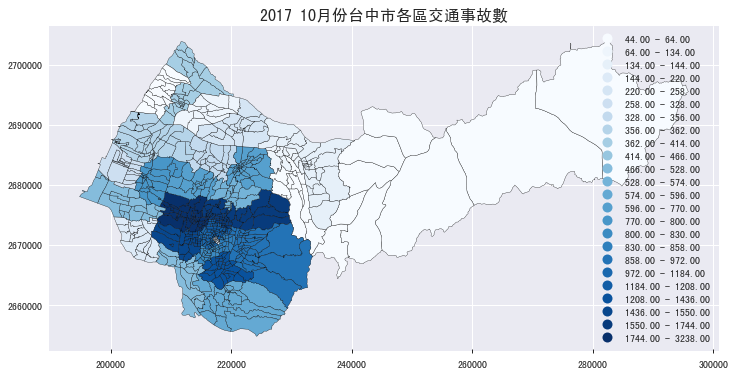

In [31]:
## 10月份 交通事故數
tc_month.plot(
    cmap=plt.cm.Blues, #指定顏色
    column='10月', #指定從自身的這個 column 讀取顏色深度
    figsize=(12,9),
    legend = True, 
    k = len(df['區'].unique()),  #分成幾類
    scheme='QUANTILES',
    edgecolor='black'  #區里邊界線的顏色
)
plt.title("2017 10月份台中市各區交通事故數", fontsize = 16 )

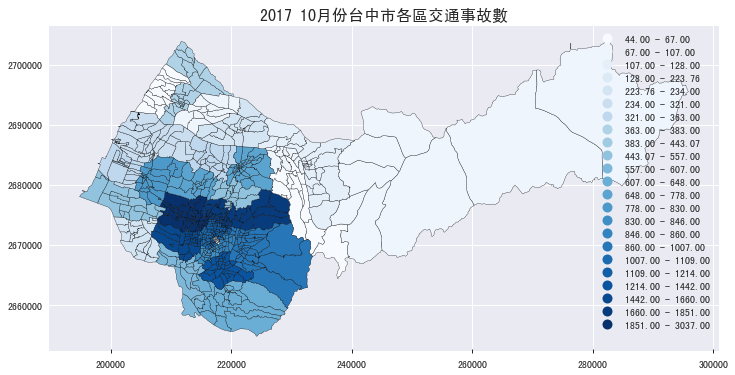

In [32]:
## 11月份 交通事故數
tc_month.plot(
    cmap=plt.cm.Blues, #指定顏色
    column='11月', #指定從自身的這個 column 讀取顏色深度
    figsize=(12,9),
    legend = True, 
    k = len(df['區'].unique()),  #分成幾類
    scheme='QUANTILES',
    edgecolor='black'  #區里邊界線的顏色
)
plt.title("2017 10月份台中市各區交通事故數", fontsize = 16 )

## 區以下不細分

In [41]:
# 同區不同里合併
taichung_shp_groupby = taichung_shp.groupby(by = ['COUNTYNAME', 'TOWNNAME'])
taichung = gpd.GeoDataFrame(a['geometry'].agg(lambda t: shapely.ops.unary_union(t))).reset_index()
taichung.head()

,COUNTYNAME,TOWNNAME,geometry
0,臺中市,中區,"POLYGON ((218066.2445669484 2670294.271219369,..."
1,臺中市,北區,"POLYGON ((217069.7149015081 2671183.308862374,..."
2,臺中市,北屯區,"POLYGON ((223468.3141164089 2672766.346035606,..."
3,臺中市,南區,"POLYGON ((215610.247254212 2667150.221718718, ..."
4,臺中市,南屯區,"POLYGON ((211982.7900585791 2667504.921824572,..."


In [58]:
##### 區以下不區分 檔案合併 ####
taichung_shp_month = taichung.merge(tc10, left_on='TOWNNAME', right_on='區').drop(['區'], axis=1)
taichung_shp_month = taichung_shp_month.merge(tc11, left_on='TOWNNAME', right_on='區').drop(['區'], axis=1)
#taichung_shp_month = taichung_shp_month.drop(['區'], axis=1)
taichung_shp_month.head()

,COUNTYNAME,TOWNNAME,geometry,10月,11月
0,臺中市,中區,"POLYGON ((218066.2445669484 2670294.271219369,...",242,223
1,臺中市,北區,"POLYGON ((217069.7149015081 2671183.308862374,...",1208,1214
2,臺中市,北屯區,"POLYGON ((223468.3141164089 2672766.346035606,...",1744,1851
3,臺中市,南區,"POLYGON ((215610.247254212 2667150.221718718, ...",830,846
4,臺中市,南屯區,"POLYGON ((211982.7900585791 2667504.921824572,...",1550,1660


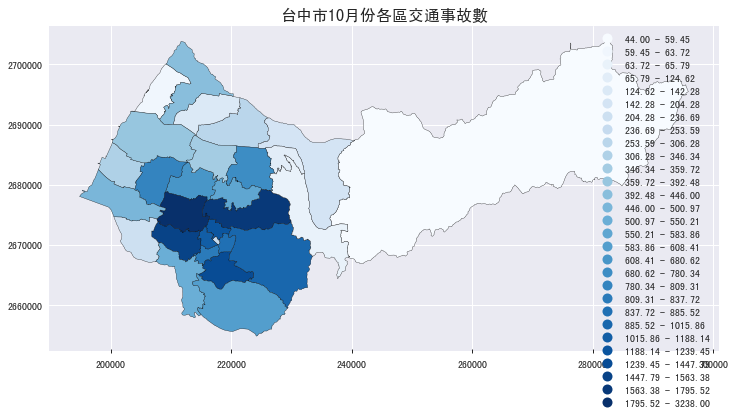

In [63]:
##### 區以下不區分 10月份台中市交通事故數 ####
taichung_shp_month.plot(
    cmap=plt.cm.Blues, #指定顏色
    column='10月', #指定從自身的這個 column 讀取顏色深度
    legend = True, 
    scheme='QUANTILES',
    k = 29,  #分成幾塊
    figsize=(12,9),
    edgecolor='black'  #區里邊界線的顏色
)
plt.title("台中市10月份各區交通事故數", fontsize = 16 )

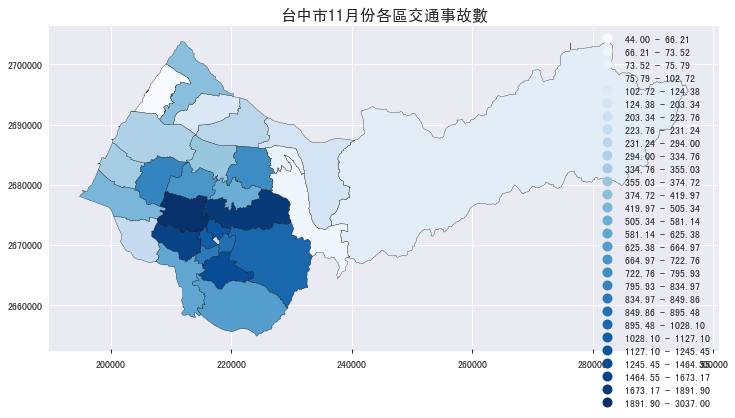

In [64]:
##### 區以下不區分 11月份台中市交通事故數 ####
taichung_shp_month.plot(
    cmap=plt.cm.Blues, #指定顏色
    column='11月', #指定從自身的這個 column 讀取顏色深度
    legend = True, 
    scheme='QUANTILES',
    k = 29,  #分成幾塊
    figsize=(12,9),
    edgecolor='black'  #區里邊界線的顏色
)
plt.title("台中市11月份各區交通事故數", fontsize = 16 )

# ======== 測試區 ========

In [ ]:
#a = df.groupby(['區'])['count'].count()
#df.groupby(['區']).size()

In [6]:
tc = pd.DataFrame({'count' : df.groupby(['區']).size()}).reset_index()

In [8]:
#pd.merge(df1,df2,left_on='lkey',right_on='rkey')
try_shp = pd.merge(taichung_shp, tc, left_on='TOWNNAME', right_on='區')
try_shp = try_shp.drop(['區'], axis=1)
try_shp.head()s

,VILLCODE,COUNTYNAME,TOWNNAME,VILLNAME,VILLENG,COUNTYID,COUNTYCODE,TOWNID,TOWNCODE,NOTE,geometry,count
0,66000110029,臺中市,大甲區,建興里,Jianxing Vil.,B,66000,B11,66000110,None,"POLYGON ((211953.8593720552 2700835.999980656,...",797
1,66000110001,臺中市,大甲區,朝陽里,Zhaoyang Vil.,B,66000,B11,66000110,None,"POLYGON ((212318.5395869798 2693453.000670101,...",797
2,66000110002,臺中市,大甲區,大甲里,Dajia Vil.,B,66000,B11,66000110,None,"POLYGON ((212230.3987713201 2693303.010372205,...",797
3,66000110003,臺中市,大甲區,順天里,Shuntian Vil.,B,66000,B11,66000110,None,"POLYGON ((211594.8088072341 2693601.746049465,...",797
4,66000110004,臺中市,大甲區,孔門里,Kongmen Vil.,B,66000,B11,66000110,None,"POLYGON ((212024.0327582744 2693667.445433716,...",797


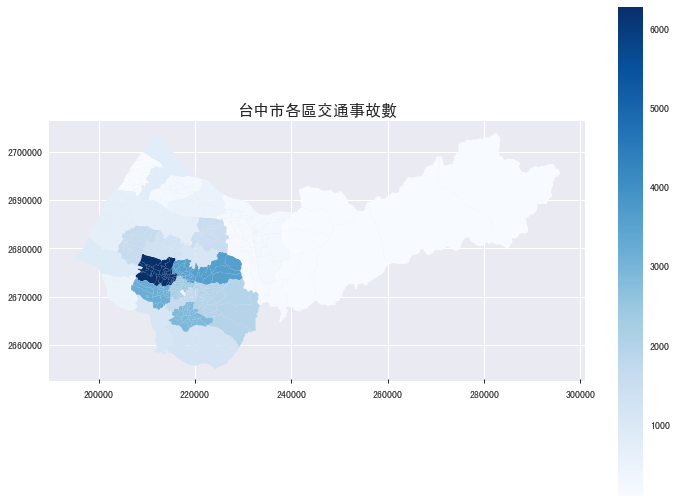

In [7]:
pd.merge(taichung_shp, tc, left_on='TOWNNAME', right_on='區').plot(
    cmap=plt.cm.Blues, #指定顏色
    column='count', #指定從自身的這個 column 讀取顏色深度
    figsize=(12,9),
    legend = True
)
plt.title("台中市各區交通事故數", fontsize = 16 )

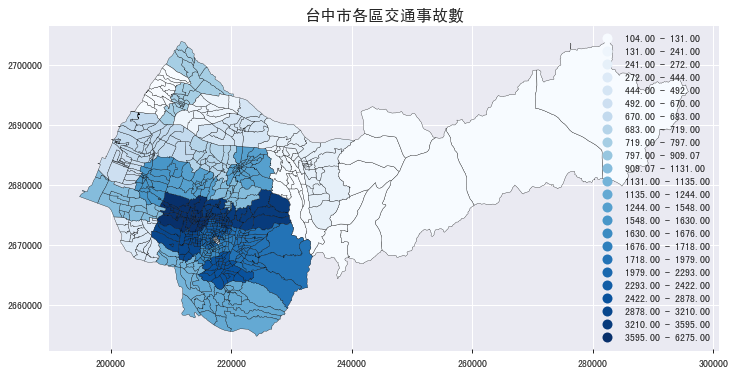

In [10]:
try_shp.plot(
    cmap=plt.cm.Blues, #指定顏色
    column='count', #指定從自身的這個 column 讀取顏色深度
    figsize=(12,9),
    legend = True, 
    k = 29,  #分成幾塊
    scheme='QUANTILES',
    edgecolor='black'  #區里邊界線的顏色
)
plt.title("台中市各區交通事故數", fontsize = 16 )